<a href="https://colab.research.google.com/github/yamil-abraham/california-housing-prices-analyzing-dataset/blob/main/California_Housing_Prices_Analyzing_Dataset_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

data = pd.read_csv("housing.csv")

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

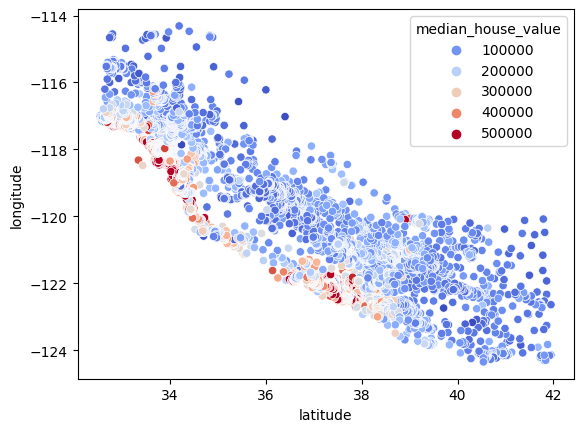

In [7]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value",
                palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

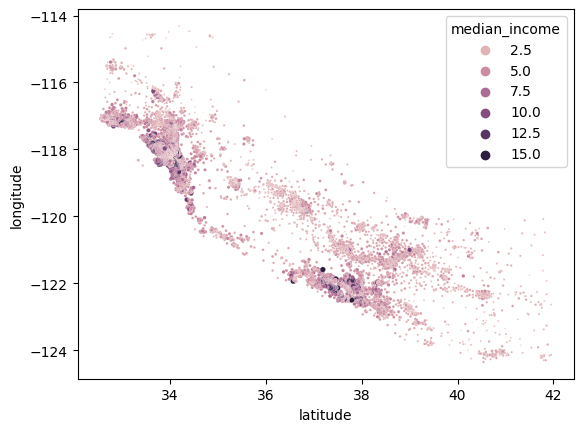

In [11]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=data, hue="median_income",
               s=data["median_income"])

In [12]:
data.loc[0:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [21]:
from sklearn.cluster import KMeans

X = data.loc[:, ["latitude", "longitude", "median_income"]]
model = KMeans(n_clusters=6)
predictions = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
predictions.shape

(20640,)

In [23]:
X["economic_segment"] = predictions

In [24]:
X

,latitude,longitude,median_income,economic_segment
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,2
...,...,...,...,...
20635,39.48,-121.09,1.5603,2
20636,39.49,-121.21,2.5568,2
20637,39.43,-121.22,1.7000,2
20638,39.43,-121.32,1.8672,2


In [25]:
X["economic_segment"].value_counts()

0    7009
2    4876
3    3842
1    2771
4    1684
5     458
Name: economic_segment, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

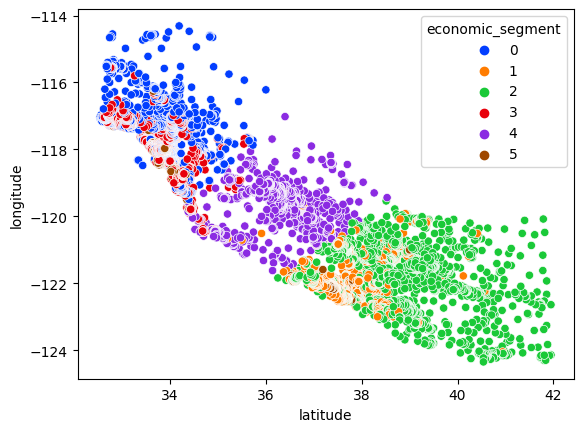

In [27]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="economic_segment",
                palette="bright")

<Axes: xlabel='economic_segment', ylabel='count'>

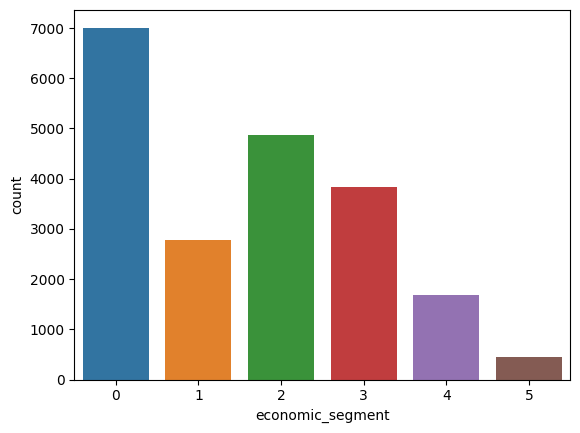

In [28]:
sb.countplot(x="economic_segment", data=X)

In [29]:
X.groupby(["economic_segment"])["median_income"].mean()

economic_segment
0     2.872779
1     5.518715
2     2.822290
3     5.515851
4     2.668885
5    10.950196
Name: median_income, dtype: float64